![Texto alternativo](https://laserud.co/wp-content/uploads/2020/05/cropped-LOGOLASER-1.jpg "Grupo LASER")

# Algoritmo del vecindario más cercano

Es un algoritmo de clasificación muy popular puesto que no pretende construir un modelo general, sino que pretende agrupar los datos por caracteristicas y/o regiones a partir de la probabilidad de que un elemento pertenezca a alguna clase debido a su similitud con otros elementos que se conoce a priori que pertenecen a dicha clase.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo de la vecindad mas cercana; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier">aquí</a>

In [1]:
!pip install sklearn

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Ahora vamos a agregar la librería que contiene el modelo basado en un Agrupamiento por Vecindades y la librería datetime, puesto que vamos a crear una función **knn_algorithm** que recibe como parametro las variables **neighbors, train_data, x_variables, y_variable** que hacen referencia la cantidad de vecindades que tendrá el modelo (usualmente es el numero de posibles valores/estados de la variable de decision), el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [2]:
from sklearn.neighbors import KNeighborsClassifier

import datetime

def knn_algorithm(neighbors, train_data, x_variables, y_variable):
    x_train = train_data[x_variables]
    y_train = train_data[[y_variable]]
    
    start_time = datetime.datetime.now()
    
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(x_train,y_train.values.ravel())
    
    elapsed_time = datetime.datetime.now() - start_time
    
    return model, (elapsed_time.total_seconds() * 1000)


En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/LASER-UD/machinelearning/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/LASER-UD/machinelearning/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [3]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
data_stream = requests.get(url).content

import io

headers = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


animal_name  hair  feathers  eggs  milk  airbone  aquatic  predator  \
0      aardvark     1         0     0     1        0        0         1   
1      antelope     1         0     0     1        0        0         0   
2          bass     0         0     1     0        0        1         1   
3          bear     1         0     0     1        0        0         1   
4          boar     1         0     0     1        0        0         1   
..          ...   ...       ...   ...   ...      ...      ...       ...   
96      wallaby     1         0     0     1        0        0         0   
97         wasp     1         0     1     0        1        0         0   
98         wolf     1         0     0     1        0        0         1   
99         worm     0         0     1     0        0        0         0   
100        wren     0         1     1     0        1        0         0   

     toother  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [4]:
x_columns =  ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
target_column_name = 'type'
y_columns = [target_column_name]
target_classes_name = ['1', '2', '3', '4', '5', '6', '7']

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación del modelo de vecindario más cercano con el siguiente fragmento de código:

In [5]:
# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [6]:
train_data.describe()

hair   feathers       eggs       milk    airbone    aquatic  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.491803   0.163934   0.508197   0.475410   0.213115   0.311475   
std     0.504082   0.373288   0.504082   0.503539   0.412907   0.466940   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   1.000000   0.000000   0.000000   0.000000   
75%     1.000000   0.000000   1.000000   1.000000   0.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

        predator    toother   backbone   breathes   venomous       fins  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.573770   0.590164   0.786885   0.836066   0.081967   0.147541   
std     0.498632   0.495885   0.412907   0.373288   0.276591   0.357588   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   1.000000   1.000000   0.000000   0.000000   
50%     1.000000   1.000000   1.000000   1.000000   0.000000   0.000000   
75%     1.000000   1.000000   1.000000   1.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

            legs       tail   domestic    catsize       type  
count  61.000000  61.000000  61.000000  61.000000  61.000000  
mean    3.000000   0.737705   0.114754   0.491803   2.704918  
std     2.065591   0.443533   0.321370   0.504082   2.178258  
min     0.000000   0.000000   0.000000   0.000000   1.000000  
25%     2.000000   0.000000   0.000000   0.000000   1.000000  
50%     4.000000   1.000000   0.000000   0.000000   2.000000  
75%     4.000000   1.000000   0.000000   1.000000   4.000000  
max     8.000000   1.000000   1.000000   1.000000   7.000000

In [7]:
train_data.corr(method='pearson')

hair  feathers      eggs      milk   airbone   aquatic  \
hair      1.000000 -0.435607 -0.737634  0.836384 -0.191655 -0.449229   
feathers -0.435607  1.000000  0.435607 -0.421540  0.526477  0.180265   
eggs     -0.737634  0.435607  1.000000 -0.902046  0.431879  0.307612   
milk      0.836384 -0.421540 -0.902046  1.000000 -0.415261 -0.285864   
airbone  -0.191655  0.526477  0.431879 -0.415261  1.000000 -0.004251   
aquatic  -0.449229  0.180265  0.307612 -0.285864 -0.004251  1.000000   
predator -0.080440 -0.066055 -0.118485  0.090320 -0.280007  0.293371   
toother   0.553080 -0.531369 -0.753107  0.726562 -0.543101 -0.087319   
backbone  0.271729  0.230444 -0.431879  0.495422 -0.217949  0.090696   
breathes  0.435607  0.196078 -0.347033  0.421540  0.230444 -0.562740   
venomous -0.054870 -0.132314  0.054870 -0.284456  0.136365 -0.071928   
fins     -0.224335 -0.184219  0.039410 -0.025796 -0.216506  0.618539   
legs      0.352149 -0.216152 -0.128054  0.112168  0.136789 -0.449280   
tail      0.064769  0.264039 -0.288406  0.269143 -0.144715  0.079156   
domestic  0.263110 -0.159429 -0.160227  0.172219 -0.061771 -0.131095   
catsize   0.606452 -0.169887 -0.672043  0.770722 -0.431879 -0.165994   
type     -0.548678 -0.144489  0.654929 -0.751290  0.182267  0.124643   

          predator   toother  backbone  breathes  venomous      fins  \
hair     -0.080440  0.553080  0.271729  0.435607 -0.054870 -0.224335   
feathers -0.066055 -0.531369  0.230444  0.196078 -0.132314 -0.184219   
eggs     -0.118485 -0.753107 -0.431879 -0.347033  0.054870  0.039410   
milk      0.090320  0.726562  0.495422  0.421540 -0.284456 -0.025796   
airbone  -0.280007 -0.543101 -0.217949  0.230444  0.136365 -0.216506   
aquatic   0.293371 -0.087319  0.090696 -0.562740 -0.071928  0.618539   
predator  1.000000  0.158013  0.118107 -0.202569  0.015849  0.171623   
toother   0.158013  1.000000  0.624500 -0.008856 -0.115539  0.346688   
backbone  0.118107  0.624500  1.000000  0.202082 -0.282300  0.216506   
breathes -0.202569 -0.008856  0.202082  1.000000 -0.029109 -0.440079   
venomous  0.015849 -0.115539 -0.282300 -0.029109  1.000000 -0.124311   
fins      0.171623  0.346688  0.216506 -0.440079 -0.124311  1.000000   
legs     -0.161817 -0.292884 -0.508073  0.324228  0.145860 -0.564108   
tail      0.088950  0.412430  0.781759  0.138621 -0.093541  0.142984   
domestic -0.209719  0.195451  0.061771  0.020498  0.079919 -0.004755   
catsize   0.052177  0.486404  0.511954  0.435607 -0.293948 -0.039410   
type     -0.071693 -0.623007 -0.904958 -0.490925  0.317445 -0.007366   

              legs      tail  domestic   catsize      type  
hair      0.352149  0.064769  0.263110  0.606452 -0.548678  
feathers -0.216152  0.264039 -0.159429 -0.169887 -0.144489  
eggs     -0.128054 -0.288406 -0.160227 -0.672043  0.654929  
milk      0.112168  0.269143  0.172219  0.770722 -0.751290  
airbone   0.136789 -0.144715 -0.061771 -0.431879  0.182267  
aquatic  -0.449280  0.079156 -0.131095 -0.165994  0.124643  
predator -0.161817  0.088950 -0.209719  0.052177 -0.071693  
toother  -0.292884  0.412430  0.195451  0.486404 -0.623007  
backbone -0.508073  0.781759  0.061771  0.511954 -0.904958  
breathes  0.324228  0.138621  0.020498  0.435607 -0.490925  
venomous  0.145860 -0.093541  0.079919 -0.293948  0.317445  
fins     -0.564108  0.142984 -0.004755 -0.039410 -0.007366  
legs      1.000000 -0.309263  0.075322  0.064027  0.237069  
tail     -0.309263  1.000000 -0.019168  0.288406 -0.650729  
domestic  0.075322 -0.019168  1.000000  0.160227 -0.093673  
catsize   0.064027  0.288406  0.160227  1.000000 -0.700466  
type      0.237069 -0.650729 -0.093673 -0.700466  1.000000

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

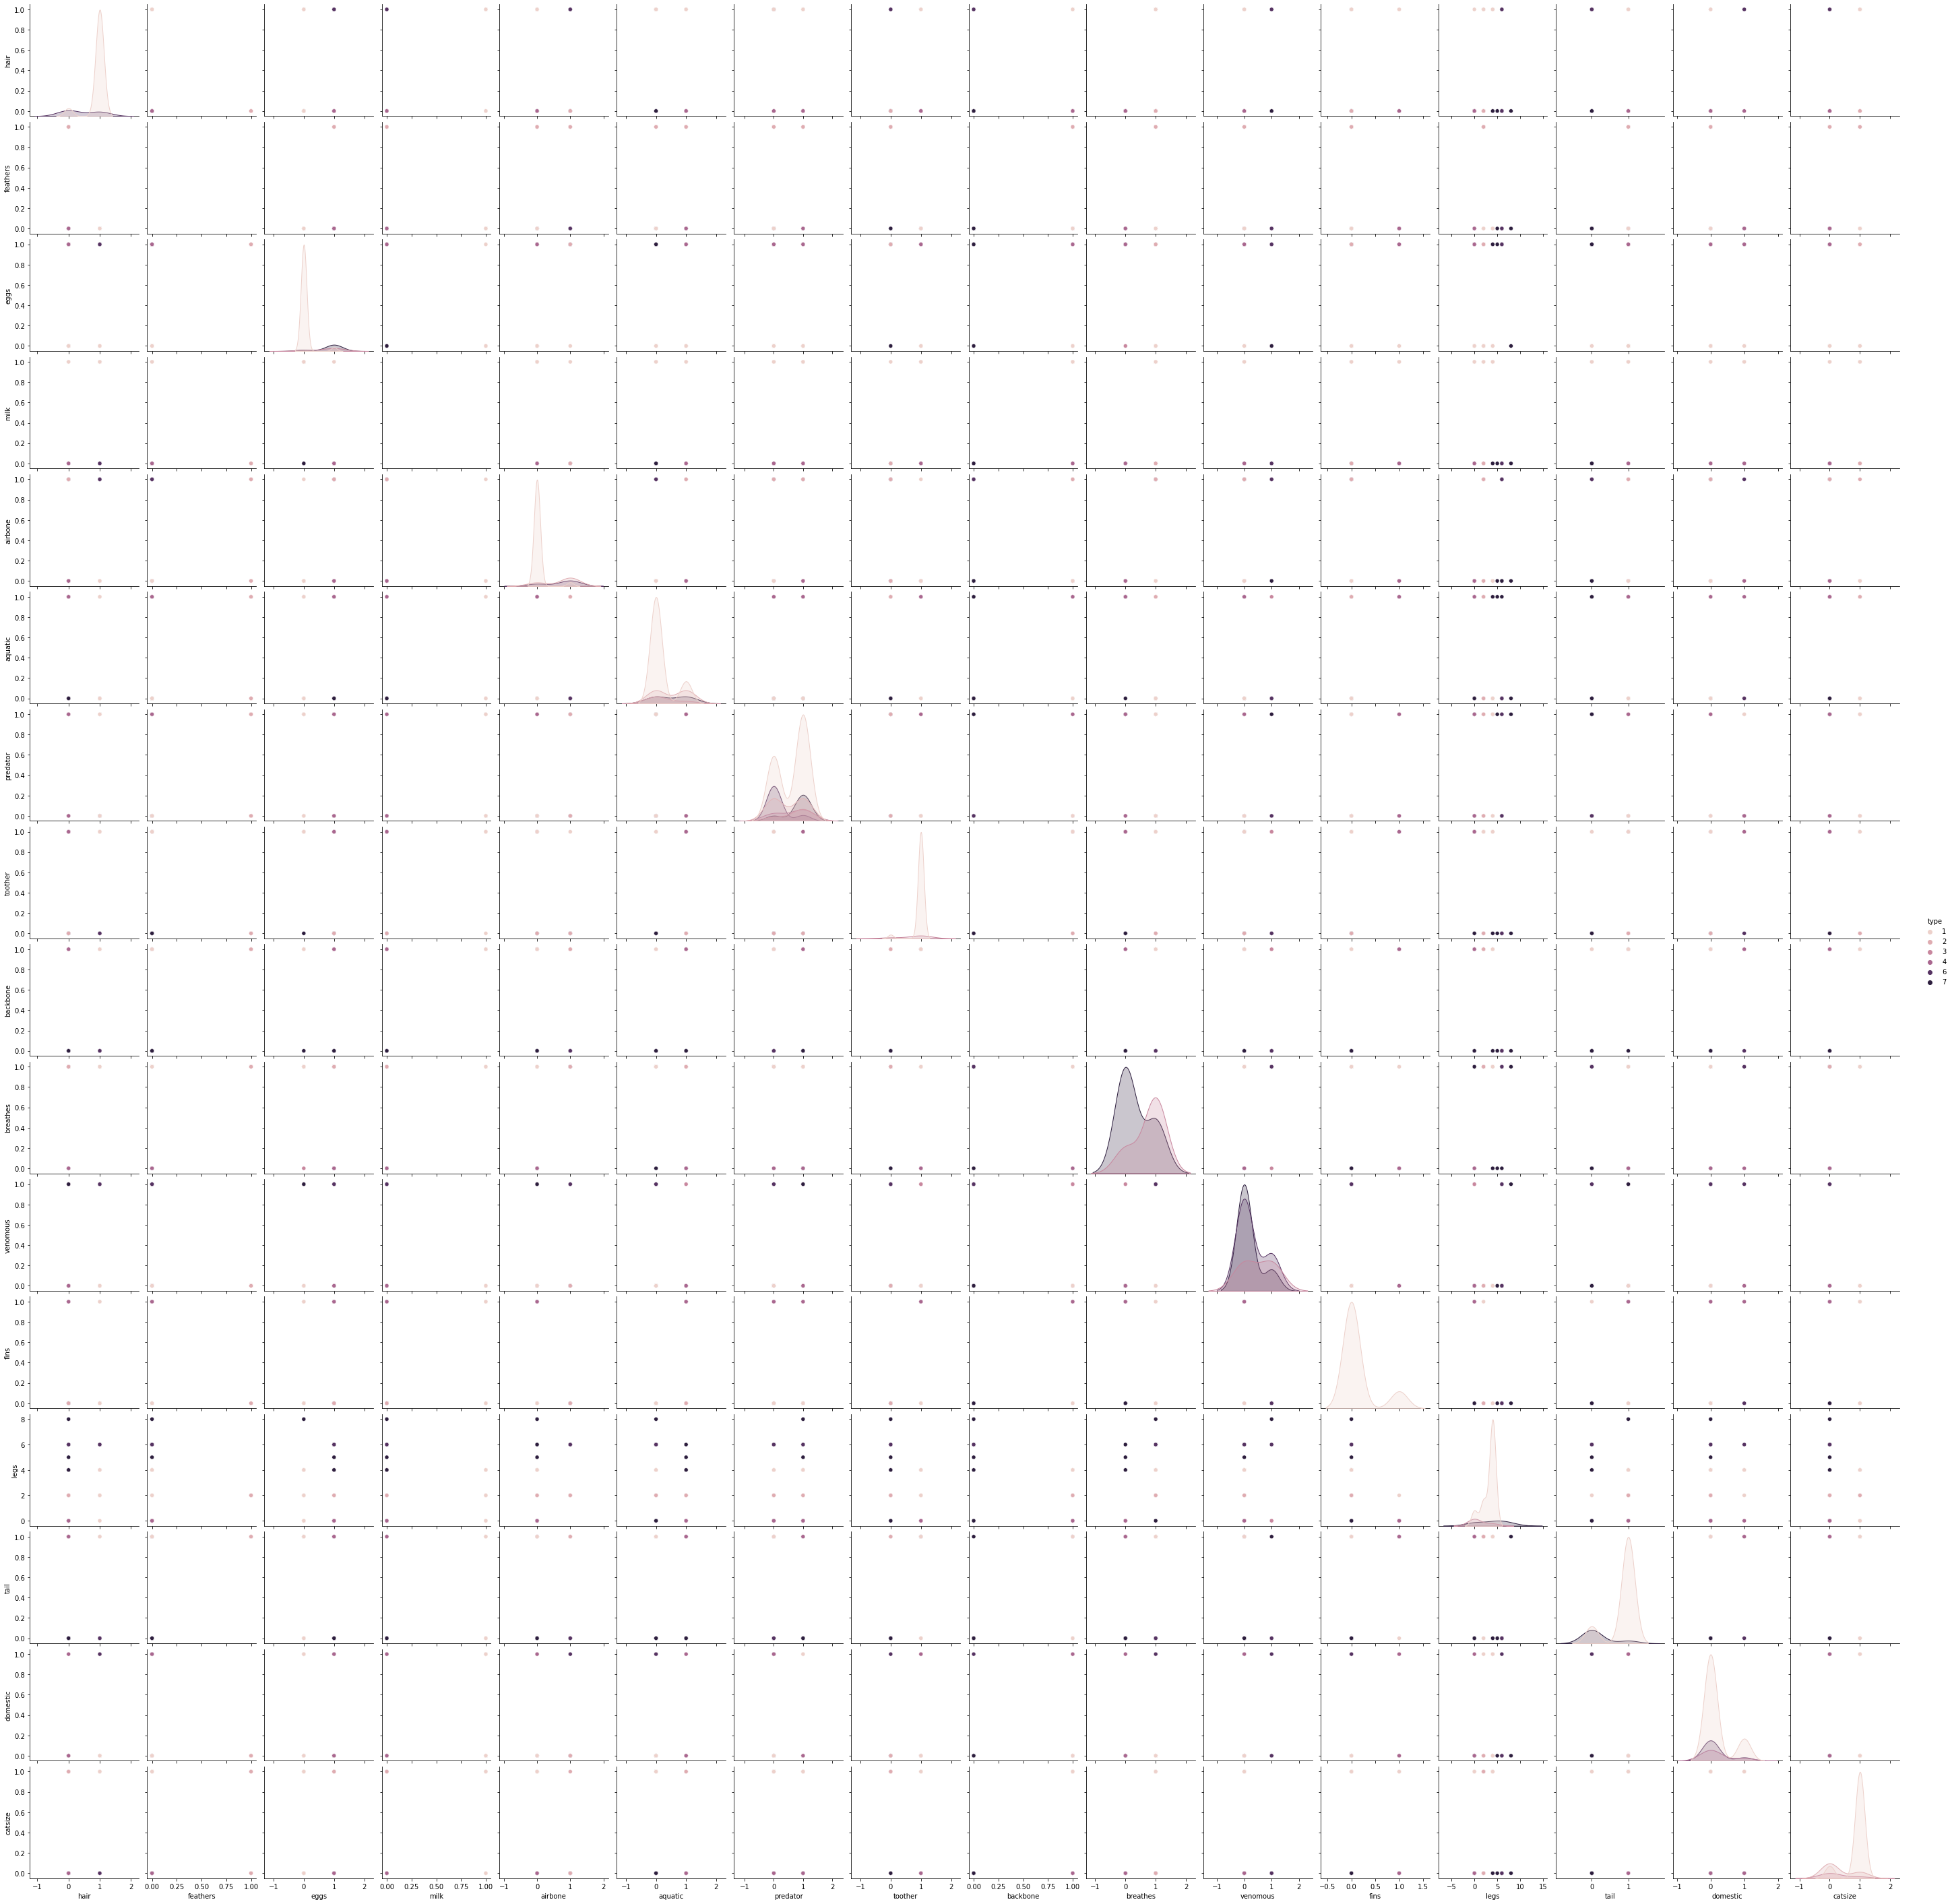

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data, hue=target_column_name)
plt.show()

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **knn_algorithm** definida previamente en esta guía, pasando como parametros:
1. El número de grupos que se tomaran como vecindades
2. El conjunto de datos de entrenamiento
3. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
4. El nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

In [9]:
# En la siguiente linea vamos a marcar los nombres de las variables independientes
x_columns = ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
y_column = 'type'
model, train_elapsed_time = knn_algorithm(3, train_data, x_columns, y_column)

Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

In [10]:
start_time = datetime.datetime.now()

predictions = model.predict(test_data[x_columns])
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions

array([1, 4, 1, 1, 1, 2, 2, 4, 2, 2, 7, 7, 1, 2, 1, 4, 7, 1, 6, 1, 7, 1,
       2, 2, 4, 1, 1, 2, 4, 7, 7, 4, 2, 1, 4, 7, 1, 4, 1, 2], dtype=int64)

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [12]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [13]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_data[y_column])
algorithm_scores.loc[len(algorithm_scores)] = ['Vecindario más cercano', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [14]:
algorithm_scores

algorithm  mean_absolute_error  mean_squared_error  \
0  Vecindario más cercano                  0.3                 0.8   

   train_elapsed_time  test_elapsed_time  
0               9.999             15.999